In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

**Problem 1**

<img src="img/TransistorWaveforms.png" width="250"> 

<hr>

**Output Voltage**

Switch $[0<t<DT_s]$

$\begin{eqnarray}
0 &=& V_g - v_L - I_L R_L\\[0.25em]
v_L &=& V_g - I_L R_L\\[0.25em]
\end{eqnarray}$

<hr>

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
0 &=& I_L R_L + v_L - v \\[0.25em]
v_L &=& v -I_L R_L \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for Inductor Voltage

$\begin{eqnarray}
<v_L> &=& \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& D (V_g - IR_L) + D' (V-IR_L) \\[0.25em]
0 &=& D V_g - IR_L + D' V  && [\text{Equivalent Voltage Circuit}] \\[0.25em]
\end{eqnarray}$

<hr>

**Capacitor Current**

Switch $[0<t<DT_s]$

$\begin{eqnarray}
i_C &=& -i_D - \frac{v}{R} \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
i_C &=& -i_D - \frac{v}{R} \\[0.25em]
\end{eqnarray}$

<hr>

Diode Reverse Recovery $[i_D]$

$\begin{eqnarray}
<i_D> &=& \int_{o}^{T_S} i_D(t) dt \\[0.25em]
i_D &=& D(0) + D'(I_L) - \text{Reverse Recovery} \\[0.25em]
i_D &=& D'I_L - \frac{Q_R}{T_s} - \frac{t_r I_L}{T_s}
\end{eqnarray}$

<hr>


Total Charge Balance over 1 period for Capacitor Current $I$

$\begin{eqnarray}
<i_C> &=& \int_{o}^{T_S} i_C(t) dt \\[0.25em]
0 &=& D (-i_D - \frac{-V}{R}) + D'(-i_D - \frac{V}{R}) \\[0.25em]
0 &=& \frac{-V}{R} -i_D \\[0.25em]
0 &=& \frac{-V}{R}- D'I_L  - \left(-\frac{Q_R}{T_s} - \frac{t_r I_L}{T_s}\right) \\[0.25em]
0 &=& - D'I_L  +\frac{Q_R}{T_s} + \frac{t_r I_L}{T_s} -\frac{V}{R}\\[0.25em]
0 &=& D'I_L  -\frac{Q_R}{T_s} - \frac{t_r I_L}{T_s} +\frac{V}{R} && [\text{Equivalent Current Circuit}] \\[0.25em]
\end{eqnarray}$

<hr>

**Transistor Current**

$\begin{eqnarray}
<i_t> &=& \int_{o}^{T_S} i_t(t) dt \\[0.25em]
&=& D(I_L) + \text{Reverse Recovery} + D'(0) \\[0.25em]
&=& D(I_L) + \frac{Q_R}{T_s} + \frac{t_r I_L}{T_s} + D'(0) \\[0.25em]
&=& D I_L + \frac{Q_R}{T_s} + \frac{t_r I_L}{T_s}  \\[0.25em]
\end{eqnarray}$

**Problem 2**

Switch $[0<t<DT_s]$

$\begin{eqnarray}
\frac{di_L}{dt} &=& \frac{V_g}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
\frac{di_L}{dt} &=& \frac{V}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
i_C &=& -\frac{V}{R}\\[0.25em]
\end{eqnarray}$

<hr>

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
i_C &=& -I - \frac{V}{R} \\[0.25em]
\end{eqnarray}$

<hr>

Total Charge Balance over 1 period for Capacitor Current $I$

$\begin{eqnarray}
I &=& V_g\frac{D}{D'D'R}  && [\text{Inductor Current }I] \\[0.25em]
\end{eqnarray}$

<hr>

**Ripple**

$\begin{eqnarray}
2\Delta i &=& (i_L \ \text{slope})\cdot D T_s \\[0.5em]
\Delta i &=& \frac{V_g}{2L}\cdot D T_s \\[0.5em]
\end{eqnarray}$

<hr>

**DCM**

$\begin{eqnarray}
I_L &\lt& \Delta i \\[0.5em]
V_g\frac{D}{D'D'R} &\lt& \frac{V_g}{2L}\cdot D T_s \\[0.5em]
\frac{1}{D'D'R} &\lt& \frac{1}{2L}\cdot T_s \\[0.5em]
\frac{2L}{RT_s} &\lt& D'D'  \\[0.5em]
K &=& \frac{2L}{RT_s} \\[0.5em]
K_{crit} &=& D' D' = D'^2 \\[0.5em]
\end{eqnarray}$

<hr>

**Output Voltage**

Switch $[0<t<D_1T_s]$

$\begin{eqnarray}
0 &=& V_g - v_L \\[0.25em]
v_L &=& V_g\\[0.25em]
\end{eqnarray}$

<hr>

Switch $[D_1T_s<t<(D_1 + D_2)T_s]$

$\begin{eqnarray}
0 &=& v_L - v \\[0.25em]
v_L &=& v \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[(D_1 + D_2)T_s<t<T_s]$

$\begin{eqnarray}
v_L &=& 0 \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for Inductor Voltage

$\begin{eqnarray}
<v_L> &=& \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& D_1 (V_g) + D_2 (V) + D_3 (0) \\[0.25em]
V &=& \frac{-D_1 V_g}{D_2}  && [\text{Output Voltage}] \\[0.25em]
D_2 &=& \frac{-D_1 V_g}{V} && [\text{Solve in terms of }D_1] \\[0.25em]
\end{eqnarray}$

<hr>

**Capacitor Charge Balance**

$\begin{eqnarray}
i_D &=& \left. i_C + \frac{v}{R}\ \right\vert_{ i_C=0} \\[0.25em]
i_D &=& \frac{V}{R}
\end{eqnarray}$

<hr>

Peak Current:

$\begin{eqnarray}
i_D(D_1 T_s) &=& i_{pk} = \frac{V_g}{L}D_1 T_s \\[0.25em]
\end{eqnarray}$

<hr>

Average Current:

$\begin{eqnarray}
<i_D> &=& \frac{1}{T_s} \int_{o}^{T_S} i_D(t) dt  \\[0.25em]
&=& \frac{1}{T_s}\cdot \frac{1}{2} i_{pk} D_2 T_s \\[0.25em]
&=& \frac{1}{T_s} \frac{1}{2} \left(\frac{V_g}{L}D_1 T_s\right) D_2 T_s \\[0.25em]
&=& \frac{V_g}{2L} D_1  D_2 T_s \\[0.25em]
\end{eqnarray}$

<hr>

Solve in terms of $D_1$

$\begin{eqnarray}
V &=& \frac{-D_1 V_g}{D_2} \\[0.25em]
D_2 &=& \frac{-D_1 V_g}{V} \\[0.25em]
\end{eqnarray}$

<hr>

Thus

$\begin{eqnarray}
<i_D> &=& \frac{V_g}{2L} D_1  D_2 T_s \\[0.25em]
\frac{V}{R} &=& \frac{V_g}{2L} D_1  \left(\frac{-D_1 V_g}{V} \right) T_s \\[0.25em]
\frac{V}{R} &=& -\frac{D_1^2 V_g^2}{2L\cdot V} T_s \\[0.25em]
\left[ \frac{V}{R} \right] \frac{2L\cdot V}{T_s} &=& \left[-\frac{D_1^2 V_g^2}{2L\cdot V} T_s \right] \frac{2L\cdot V}{T_s} \\[0.25em]
V^2\frac{2L}{RT_s} &=&  - D_1^2 V_g^2 \\[0.25em]
V^2 K &=& -D_1^2 V_g^2 \\[0.25em]
\frac{V^2}{V_g^2} &=& -\frac{D_1^2}{K} \\[0.25em]
\frac{V}{V_g} &=& -\frac{D_1}{\sqrt{K}} \\[0.25em]
\frac{V}{V_g} &=& -D_1 \cdot {\sqrt{\frac{RT_s}{2L}}}
\end{eqnarray}$

In [13]:
D1 = np.linspace(0,1,101)
K = 0.1

No handles with labels found to put in legend.


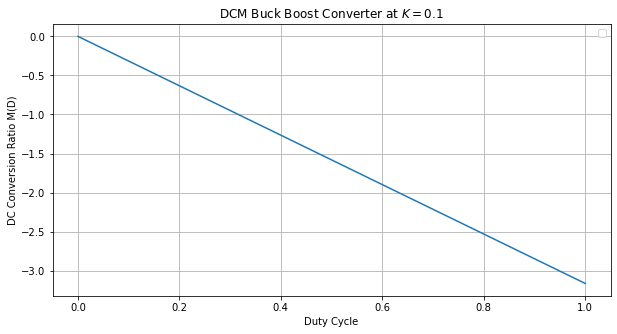

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('DCM Buck Boost Converter at $K = 0.1$')
ax.plot(D1,-D1/np.sqrt(K))
ax.set_ylabel('DC Conversion Ratio M(D)')
ax.set_xlabel('Duty Cycle')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();